



#  Forest Fires in Brazil


In [465]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

### 1. Load the csv file 

In [466]:
df=pd.read_csv("FOREST FIRES IN BRAZIL.csv")
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


### 2. Display Top 5 Rows of The Dataset

In [467]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 3. Display Last 5 Rows of Dataset

In [468]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 4. Find Shape of Our Dataset 

In [469]:
df.shape

(6454, 5)

In this data we have 6454 rows and 5 columns in dataset

### 5. Getting Information About Our Dataset


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


### 6. Check For Duplicate Data and Drop Them

In [471]:
df.duplicated().sum()

32

In [472]:
df.drop_duplicates(inplace=True)

### 7. Check Null Values In The Dataset

In [473]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### 8. Get Overall Statistics About The Dataframe

In [474]:
df.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


### 9. Rename Month Names To English

In [475]:
df['month'] = df['month'].map({'Janeiro':'jan', 'Fevereiro':'feb',
                          'Março':'Mar', 'Abril':'Apr', 'Maio':'May', 'Junho':'Jun',         
                          'Julho':'Jul',  'Agosto':'Aug','Setembro':'Sep' ,
                         'Outubro':'Oct', 'Novembro':'Nov',           
                          'Dezembro':'Dec'           
                                    })

In [476]:
df['month'].unique()

array(['jan', 'feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

### 10. Total Number of Fires Registered

In [477]:
df["number"].sum()

698811.073

### 11. In Which Month Maximum Number of Forest Fires Were Reported?

In [478]:
df.groupby('month')['number'].max().sort_values(ascending=False).head(1)

month
Sep    998.0
Name: number, dtype: float64

### 12. In Which Year Maximum Number of Forest Fires Was Reported?

In [479]:
df.groupby('year')['number'].max().sort_values(ascending=False).head(1)

year
2008    998.0
Name: number, dtype: float64

### 13.  In Which State Maximum Number of Forest Fires Was Reported?

In [480]:
df.groupby('state')['number'].max().sort_values(ascending=False).head(1)

state
Amazonas    998.0
Name: number, dtype: float64

### 14. Find Total Number of Fires Were Reported In Amazonas

In [481]:
df[df['state'] == 'Amazonas']['number'].sum()

30650.129

### 15. In Which State Maximum Number of Forest Fires Was Reported?

In [482]:
df.groupby('state')['number'].max().head(1).reset_index()

,state,number
0,Acre,960.0


### 16. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [483]:
df2=df.groupby('year')['number'].sum().reset_index()
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


Text(0, 0.5, 'Number of fires reported in Amazonas')

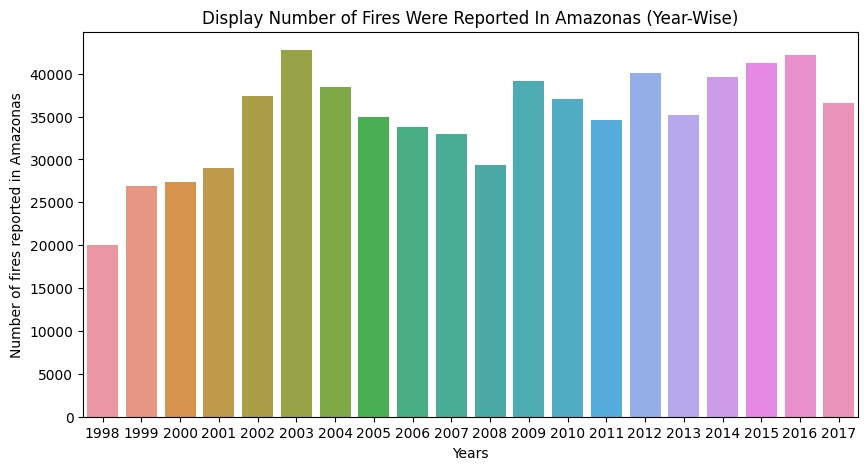

In [484]:
plt.figure(figsize=(10,5))

sns.barplot(x ='year',y='number',data=df2)

plt.title("Display Number of Fires Were Reported In Amazonas (Year-Wise)")
plt.xlabel('Years')
plt.ylabel('Number of fires reported in Amazonas')


### 17. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [485]:
df[df['year'] == 2015]['number'].sum()

41208.292

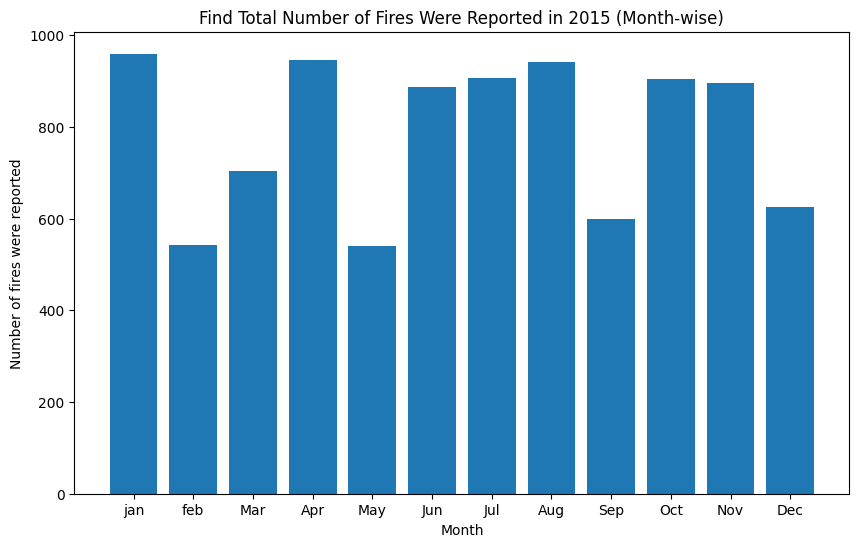

In [492]:
plt.figure(figsize=(10,6))
plt.bar(x='month',height='number',data=df[df['year'] == 2015])

plt.title("Find Total Number of Fires Were Reported in 2015 (Month-wise)")
plt.xlabel("Month")
plt.ylabel("Number of fires were reported")

plt.show()

### 18. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [487]:
df3=df.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
df3

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


Text(0.5, 0, 'Number of fires were reported')

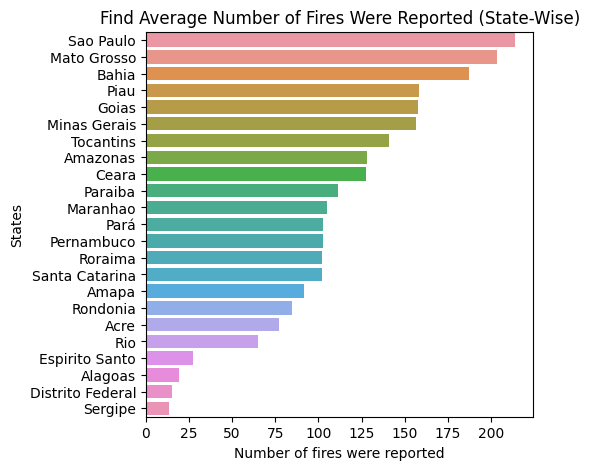

In [488]:
plt.figure(figsize=(5,5))

sns.barplot(x ='number',y='state',data=df3)

plt.title("Find Average Number of Fires Were Reported (State-Wise)")
plt.ylabel("States")
plt.xlabel("Number of fires were reported")


### 19.  To Find The State Names Where Fires Were Reported In 'Dec' Month

In [489]:
df[df['month'] == 'Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

### 20. Find Average Number of Fires Were Reported From Highest to Lowest (Month-Wise)

In [490]:
df1=df.groupby('month')['number'].mean().sort_values(ascending = False).reset_index()
df1

,month,number
0,Jul,171.278503
1,Oct,164.225146
2,Aug,163.056361
3,Nov,158.348248
4,Dec,112.154932
5,Sep,108.478343
6,Jun,103.891790
7,jan,89.124942
8,May,65.150775
9,feb,57.643084


Text(0, 0.5, 'Total number of fires reported')

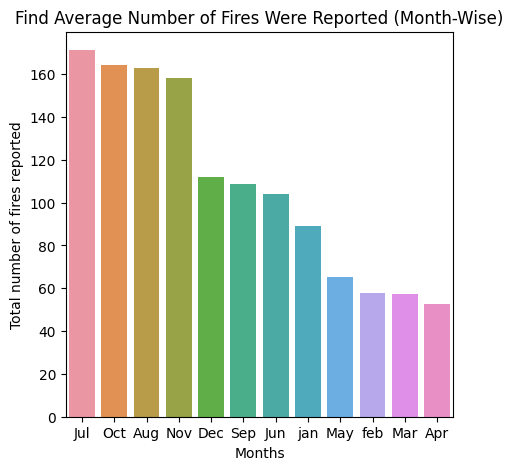

In [491]:
plt.figure(figsize=(5,5))

sns.barplot(x ='month',y='number',data=df1)

plt.title('Find Average Number of Fires Were Reported (Month-Wise)')
plt.xlabel('Months')
plt.ylabel('Total number of fires reported')